# Author: Ahmed Khaled

### Finding the optimal number of clusters using the k-means clustering algorithm.
#### By using the elbow method we will find the optiamal number of clusters.

# Solution Roadmap:
1. Importing the necessary packages.
2. Loading the dataset.
3. splitting the data to have the features.
4. Loop over N clusters and find the optimal ssm(Sum of squared distances).
5. Visualizing the resulting ssm array.
6. Creating new K-means Algorithm and training and predicting the features. 
7. plotting the new clusters

In [40]:
import numpy as np
import pandas as  pd
import  matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

In [30]:
path = 'Iris.csv'
df = pd.read_csv(path, index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Splitting the data into features.

In [67]:
X = df.iloc[:, :-1].values

### Looping over N numbers of cluster to see which one is the optimal.

In [68]:
ssd = []
for cluster in range(1, 16):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
ssd

[680.8244000000001,
 152.36870647733906,
 78.94084142614601,
 57.317873214285726,
 46.535582051282056,
 39.185257692307694,
 34.299985543844244,
 29.985923949641347,
 28.137441399392205,
 26.709948717948716,
 24.785850108225112,
 23.264330547376606,
 21.988968101343104,
 20.575496753246753,
 18.94913741813742]

### Visualizing the Sum of squared distances of samples

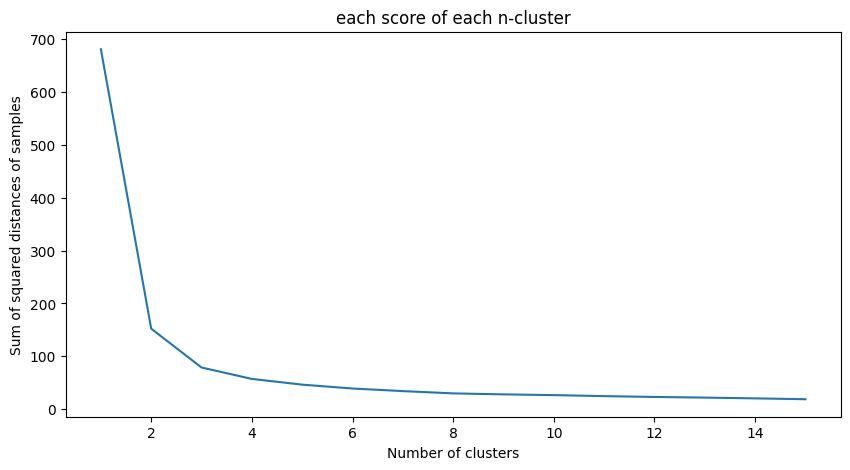

In [69]:
plt.plot(range(1, 16), ssd)
plt.title('each score of each n-cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances of samples') # Within cluster sum of squares
plt.show()

### Creating the model and clustering each entry.

In [70]:
kmeans = KMeans(n_clusters=3)
y_clustered = kmeans.fit_predict(X)

### Visualizing the clusters

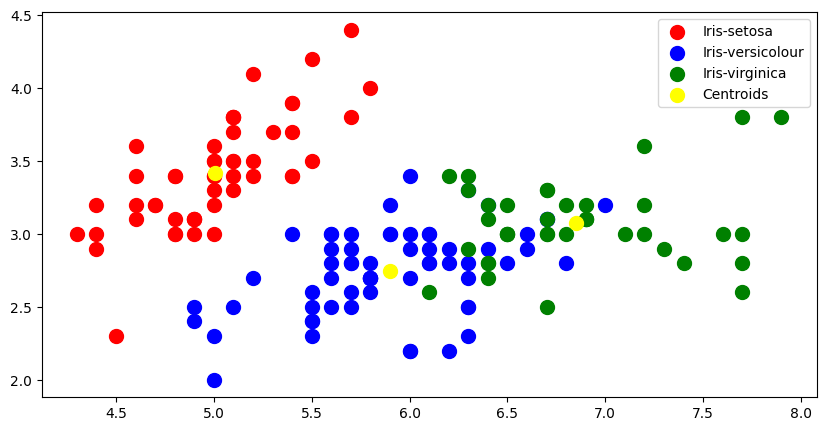

In [71]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_clustered == 0, 0], X[y_clustered == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_clustered == 1, 0], X[y_clustered == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_clustered == 2, 0], X[y_clustered == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()